In [1]:
import torch
import torch.nn
import torchvision.transforms as transforms

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from models.deepcrack_networks import define_deepcrack

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#--- build the model ---#
crack_model = define_deepcrack(
    in_nc = 3,
    num_classes = 1,
    ngf = 64
).eval()

#--- download the pretrained model and copy to the "./pretrained_models" folder ---#
state_dict = torch.load("./pretrained_models/pretrained_net_G.pth")
crack_model.load_state_dict(state_dict)

initialize network with xavier


<All keys matched successfully>

torch.Size([1, 3, 384, 544])


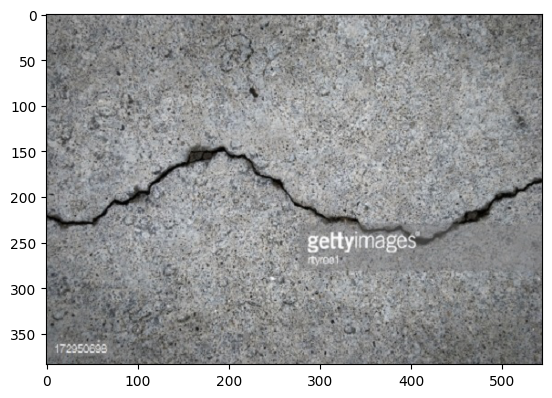

In [4]:
#--- load a test image ---#
test_img = Image.open("./datasets/demo/crack_image.png").convert("RGB")
plt.imshow(np.array(test_img))

#--- transform to torch.Tensor type ---#
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))])
test_img = transform(test_img).unsqueeze(0)
print(test_img.shape)

In [5]:
#--- inference and convert the prediction value between 0 and 1 by sigmoid function -
with torch.no_grad():
    pred = crack_model(test_img)[-1]

pred = torch.sigmoid(pred)
print(pred.shape)

print(torch.max(pred), torch.min(pred))

torch.Size([1, 1, 384, 544])
tensor(0.8929) tensor(9.8542e-06)


In [6]:
pred = (pred.squeeze().numpy() * 255).astype("uint8")
print(pred.shape)

(384, 544)


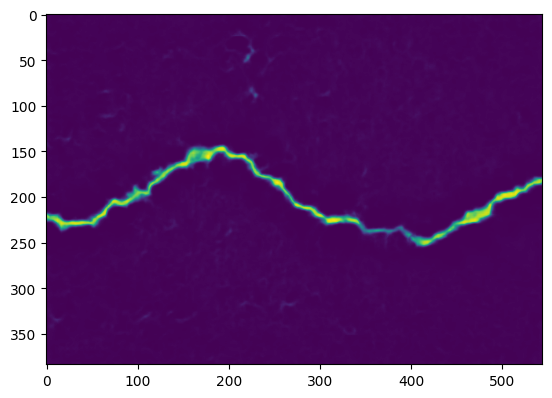

In [7]:
plt.imshow(pred)